<a href="https://colab.research.google.com/github/darkknightxi/Banking-Boosting/blob/main/Bank_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data

In [1]:
import pandas as pd

In [2]:
bank = pd.read_csv("bank-additional-full.csv", sep=";")

In [3]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Data Exploration

In [4]:
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [5]:
bank.shape

(41188, 21)

In [6]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<Axes: >

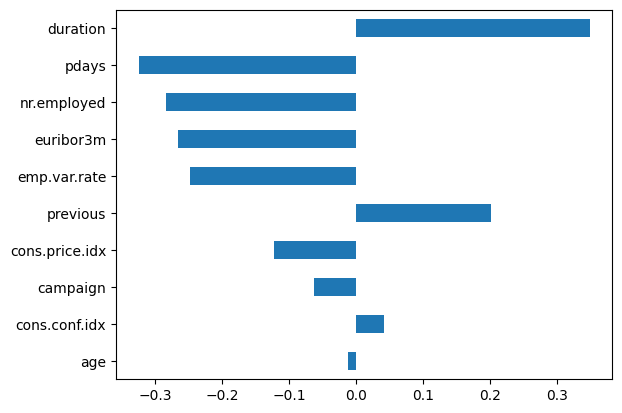

In [7]:
#spearman correlation
(bank
    .assign(subscribed=bank['y'] == 'yes')
    .corr(method='spearman', numeric_only=True)
    .loc[:, 'subscribed']
    .iloc[:-1]
    .sort_values(key=lambda x : abs(x))
    .plot.barh()
)

<Axes: xlabel='pdays', ylabel='campaign'>

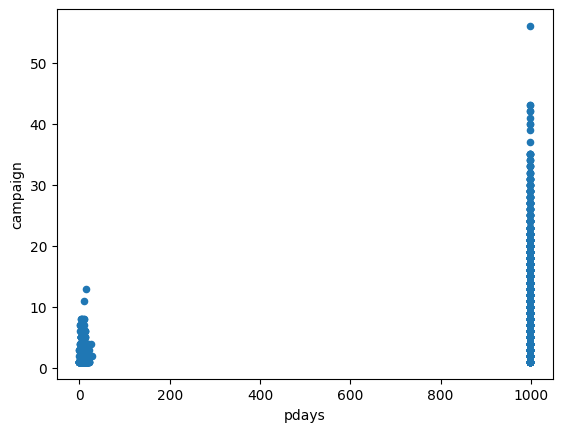

In [8]:
(bank
    .plot
    .scatter(x='pdays', y='campaign')
)

<Axes: xlabel='pdays', ylabel='campaign'>

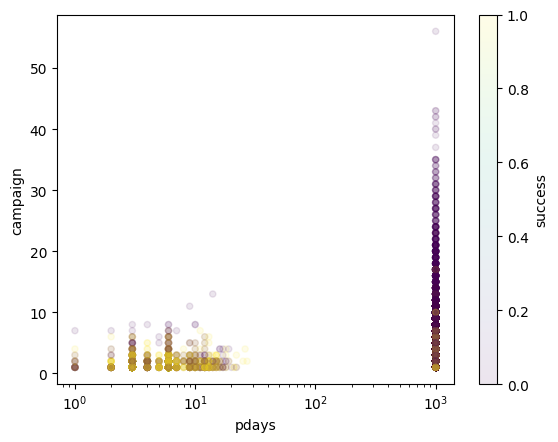

In [9]:
(bank
    .assign(success=(bank.y == 'yes').astype(int))
    .pipe(lambda df_ : df_.plot.scatter(x='pdays', y='campaign', logx=True, alpha=0.1, c='success',  cmap='viridis'))
)

y
no     Axes(0.125,0.11;0.775x0.77)
yes    Axes(0.125,0.11;0.775x0.77)
Name: campaign, dtype: object

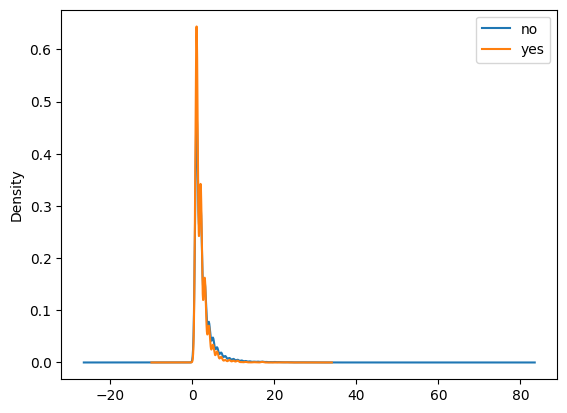

In [10]:
(bank
    .groupby('y')
    .campaign
    .plot.density(legend=True)
 )

y
no     Axes(0.125,0.11;0.775x0.77)
yes    Axes(0.125,0.11;0.775x0.77)
Name: pdays, dtype: object

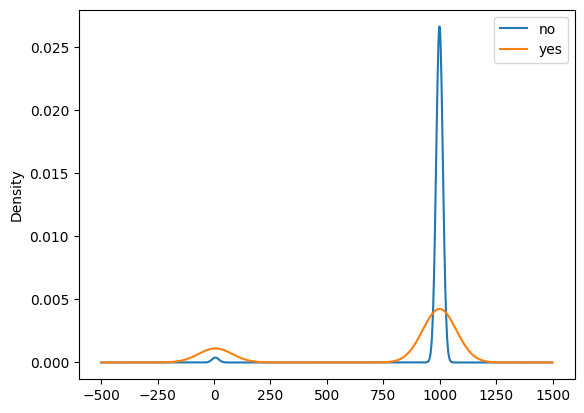

In [11]:
(bank
    .groupby('y')
    .pdays
    .plot.density(legend=True)
 )

y
no     Axes(0.125,0.11;0.775x0.77)
yes    Axes(0.125,0.11;0.775x0.77)
Name: duration, dtype: object

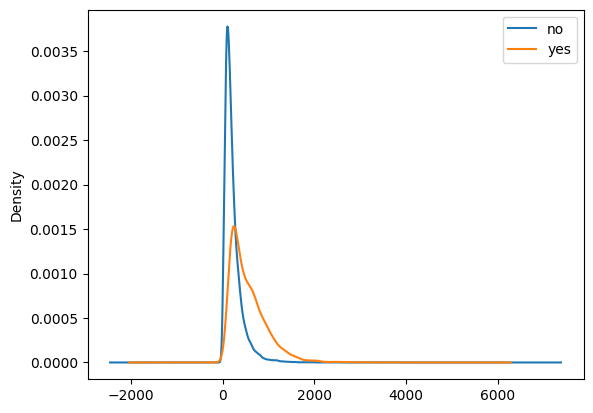

In [12]:
(bank
    .groupby('y')
    .duration
    .plot.density(legend=True)
 )

# Data Preprocessing

In [13]:
#no missing values
bank.isna().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [14]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [15]:
#convert object datatype to categories
#'category' dtype takes less memory than 'object' dtype
#ref: https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html
def obj_to_cat(df):
    return df.assign(**df.select_dtypes(object).astype('category'))

In [16]:
!pip install feature_engine

In [17]:
from sklearn import base, pipeline
from feature_engine import encoding

In [18]:
#define the transformer
class BankTransformer(base.BaseEstimator, base.TransformerMixin):
    def transform(self, X):
        return obj_to_cat(X)
    def fit(self, X, y=None):
        return self

In [19]:
#build the pipeline
pl = pipeline.Pipeline(
    [('transform', BankTransformer()),
     ('cat_encoding', encoding.OneHotEncoder(top_categories=5, drop_last=True))
     ]
)

In [20]:
pl.fit_transform(bank)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_thu,day_of_week_mon,day_of_week_wed,day_of_week_tue,day_of_week_fri,poutcome_nonexistent,poutcome_failure,poutcome_success,y_no,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,1,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,1,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,1,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,1,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,1,1,0,0,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,1,1,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,1,1,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,1,1,0,0,0,1


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_raw_train, X_raw_test, y_raw_train, y_raw_test = train_test_split(bank.drop(columns='y'),
                                                                    bank.y,
                                                                    stratify=bank.y,
                                                                    random_state=42)
X_train = pl.fit_transform(X_raw_train)
X_test = pl.transform(X_raw_test)

In [23]:
X_train

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_jun,month_nov,day_of_week_thu,day_of_week_mon,day_of_week_wed,day_of_week_tue,day_of_week_fri,poutcome_nonexistent,poutcome_failure,poutcome_success
34300,29,10,10,999,0,-1.8,92.893,-46.2,1.266,5099.1,...,0,0,1,0,0,0,0,1,0,0
25076,54,53,1,999,1,-0.1,93.200,-42.0,4.153,5195.8,...,0,1,0,0,0,1,0,0,1,0
17533,55,136,3,999,0,1.4,93.918,-42.7,4.962,5228.1,...,0,0,0,1,0,0,0,1,0,0
35820,43,715,6,999,0,-1.8,92.893,-46.2,1.244,5099.1,...,0,0,0,1,0,0,0,1,0,0
1080,54,62,5,999,0,1.1,93.994,-36.4,4.856,5191.0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14392,54,131,4,999,0,1.4,93.918,-42.7,4.962,5228.1,...,0,0,0,1,0,0,0,1,0,0
7494,29,165,1,999,0,1.1,93.994,-36.4,4.864,5191.0,...,0,0,0,0,0,0,1,1,0,0
10747,35,544,3,999,0,1.4,94.465,-41.8,4.961,5228.1,...,1,0,0,0,0,1,0,1,0,0
34138,32,1805,4,999,0,-1.8,92.893,-46.2,1.281,5099.1,...,0,0,0,0,1,0,0,1,0,0


In [24]:
X_train.isna().any().any()

False

In [25]:
from sklearn import preprocessing

In [26]:
label_encoder = preprocessing.LabelEncoder()

In [27]:
y_train = label_encoder.fit_transform(y_raw_train)
y_test = label_encoder.transform(y_raw_test)

In [28]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

# Building ML Models

## Baseline Models

### Logistic Regression

In [29]:
from sklearn import linear_model, preprocessing

In [30]:
std = preprocessing.StandardScaler()

In [31]:
log_reg = linear_model.LogisticRegression(penalty=None)

In [32]:
log_reg.fit(std.fit_transform(X_train), y_train)

LogisticRegression(penalty=None)

In [33]:
log_reg.score(std.transform(X_test), y_test)

0.913761289696028

### Vanilla XGBoost (default hyperparameters)

In [34]:
import xgboost as xgb

In [35]:
xg = xgb.XGBClassifier()

In [36]:
xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [37]:
xg.score(X_test, y_test)

0.9185199572691075

Vanilla XGBoost beats simple Logistic Regression by the barest of margins. 92% is the accuracy to beat.

## XGBoost Model

In [38]:
xg = xgb.XGBClassifier(early_stopping_rounds=30)

From the XGBoost Documentation-


early_stopping_rounds (int | None) – Activates early stopping. Validation metric needs to improve at least once in every
'early_stopping_rounds' round(s) to continue training. Requires at least one item in evals.
The method returns the model from the last iteration (not the best one).

In [39]:
xg.fit(
    X_train,
    y_train,
    eval_set = [(X_train, y_train), (X_test, y_test)],
    verbose=False
)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=30,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [40]:
xg.score(X_test, y_test)

0.9208507332232689

In [41]:
print(f'The last tree to show improvement was Tree #{xg.best_ntree_limit}')

The last tree to show improvement was Tree #24


#### Visualize the model's results

In [42]:
results = xg.evals_result()

In [43]:
min(results['validation_1']['logloss'])

0.16849236780171767

Text(0.5, 0, '# trees')

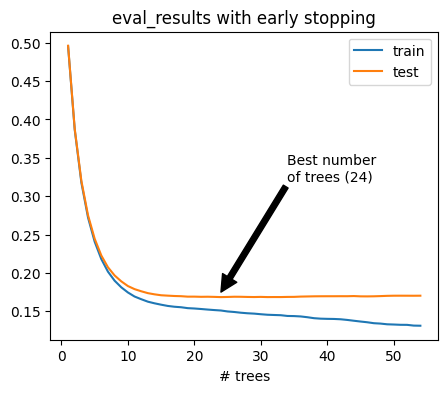

In [44]:
ax = (pd.DataFrame({'train': results['validation_0']['logloss'],
                    'test': results['validation_1']['logloss']})
    .assign(n_trees = lambda df: range(1, len(df)+1))  # why 'adf'?
    .set_index('n_trees')
    .plot(figsize=(5, 4), title='eval_results with early stopping')
)
ax.annotate('Best number \nof trees (24)', xy=(24, .17498), xytext=(34, .32), arrowprops={'color': 'k'})
ax.set_xlabel('# trees')

#### Model Evaluation

In [45]:
from sklearn import metrics

##### Confusion Matrix

In [46]:
cm = metrics.confusion_matrix(y_test, xg.predict(X_test))
cm

array([[8853,  284],
       [ 531,  629]])

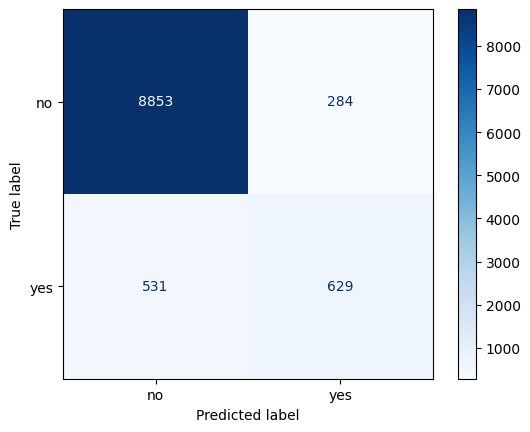

In [47]:
cm_disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                         display_labels = ['no', 'yes']
                                         )
cm_disp.plot(cmap='Blues')

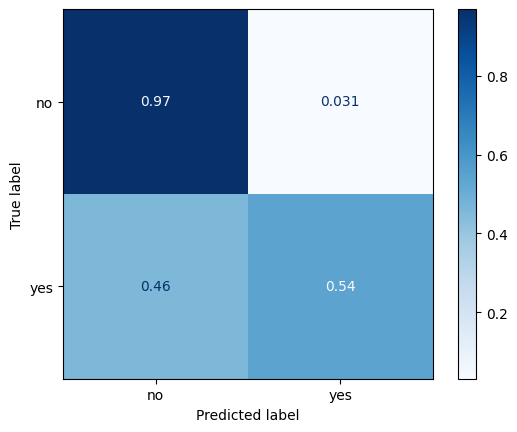

In [48]:
cm_norm = metrics.confusion_matrix(y_test, xg.predict(X_test), normalize='true')
metrics.ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=['no', 'yes']).plot(cmap='Blues')

##### Classification Report

In [49]:
cr = metrics.classification_report(y_test, xg.predict(X_test),
                                   target_names=['no', 'yes']
                                   )
print(cr)

              precision    recall  f1-score   support

          no       0.94      0.97      0.96      9137
         yes       0.69      0.54      0.61      1160

    accuracy                           0.92     10297
   macro avg       0.82      0.76      0.78     10297
weighted avg       0.91      0.92      0.92     10297



Compare the XGBoost's classification report with that of Logistic Regression, our base model

In [50]:
print(metrics.classification_report(y_test, log_reg.predict(X_test), target_names=['no', 'yes']))

              precision    recall  f1-score   support

          no       0.89      1.00      0.94      9137
         yes       0.25      0.00      0.00      1160

    accuracy                           0.89     10297
   macro avg       0.57      0.50      0.47     10297
weighted avg       0.82      0.89      0.83     10297



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


##### Precision-Recall Curve

In [51]:
from yellowbrick import classifier
import matplotlib.pyplot as plt

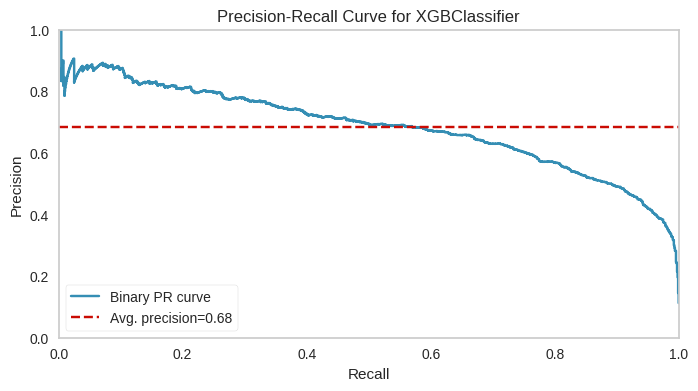

PrecisionRecallCurve(ax=<Axes: title={'center': 'Precision-Recall Curve for XGBClassifier'}, xlabel='Recall', ylabel='Precision'>,
                     estimator=XGBClassifier(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=None,
                                             colsample_bynode=None,
                                             colsample_bytree=None,
                                             early_stopping_rounds=30,
                                             enable_categorical=False,
                                             eval_metric=None,
                                             feature_types=None, gamma=...
                                             interaction_constraints=None,
                                             learning_rate=None, max_bin=None,
                                             max_cat_threshold=None,
                                             max_cat_to_onehot=None,
                                             max_delta_step=None,
                                             max_depth=None, max_leaves=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             n_estimators=100, n_jobs=None,
                                             num_parallel_tree=None,
                                             predictor=None, random_state=None, ...),
                     iso_f1_values={0.2, 0.4, 0.6, 0.8}, micro=False,
                     per_class=True)

In [52]:
fig, ax = plt.subplots(figsize=(8, 4))
classifier.precision_recall_curve(xg,
                                  X_train, y_train,
                                  X_test, y_test,
                                  micro=False,
                                  macro=False,
                                  ax=ax,
                                  per_class=True
                                  )
# ax.set_ylim((0, 1.05))

#### Pipeline to train the model for various metrics

In [53]:
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, roc_auc_score, accuracy_score
from sklearn.model_selection import cross_validate

In [54]:
def metric_data(clf, X, y, metrics=['accuracy'], cv=4):
    res = pd.DataFrame(cross_validate(clf,
                                      X, y,
                                      cv=cv,
                                      scoring=metrics,
                                      return_train_score=True)
                                    )
    return res

In [55]:
pl = pipeline.Pipeline([
    ('transformer', BankTransformer()),
    ('cat_encoder', encoding.OneHotEncoder(top_categories=5, drop_last=True)),
    ('xg', xgb.XGBClassifier()),
],
                       )

In [56]:
scorers = {
    'f1_score' : make_scorer(f1_score, average='micro'),
    'precision_score' : make_scorer(precision_score, average='micro'),
    'recall_score' : make_scorer(recall_score, average='micro'),
    'accuracy_score' : make_scorer(accuracy_score),
    'roc_auc_score' : make_scorer(roc_auc_score),
}

In [57]:
sample_size = 1000
small_data = bank.sample(sample_size).drop(columns=['y'])
small_y = bank.loc[small_data.index].y == 'yes'

In [58]:
xg_data = metric_data(pl, small_data, small_y, metrics=scorers)
xg_data

,fit_time,score_time,test_f1_score,train_f1_score,test_precision_score,train_precision_score,test_recall_score,train_recall_score,test_accuracy_score,train_accuracy_score,test_roc_auc_score,train_roc_auc_score
0,0.994165,0.030023,0.900,1.0,0.900,1.0,0.900,1.0,0.900,1.0,0.797459,1.0
1,0.159028,0.029518,0.948,1.0,0.948,1.0,0.948,1.0,0.948,1.0,0.808088,1.0
2,0.155477,0.029679,0.920,1.0,0.920,1.0,0.920,1.0,0.920,1.0,0.767696,1.0
3,0.196629,0.030209,0.912,1.0,0.912,1.0,0.912,1.0,0.912,1.0,0.700772,1.0


Again compare with the baseline logistic regression model

In [59]:
pl_lr = pipeline.Pipeline(
    [('transformer', BankTransformer()),
     ('cat_encoder', encoding.OneHotEncoder(top_categories=5, drop_last=True)),
     ('scaler', preprocessing.StandardScaler()),
     ('lr', linear_model.LogisticRegression(penalty=None, max_iter=300))
     ]
)

In [60]:
lr_data = metric_data(pl_lr, small_data, small_y, metrics=scorers)
lr_data

,fit_time,score_time,test_f1_score,train_f1_score,test_precision_score,train_precision_score,test_recall_score,train_recall_score,test_accuracy_score,train_accuracy_score,test_roc_auc_score,train_roc_auc_score
0,0.069798,0.038122,0.892,0.937333,0.892,0.937333,0.892,0.937333,0.892,0.937333,0.760422,0.795985
1,0.081509,0.033880,0.936,0.921333,0.936,0.921333,0.936,0.921333,0.936,0.921333,0.752533,0.739519
2,0.065727,0.040966,0.908,0.936000,0.908,0.936000,0.908,0.936000,0.908,0.936000,0.667310,0.787553
3,0.068597,0.036178,0.904,0.930667,0.904,0.930667,0.904,0.930667,0.904,0.930667,0.696268,0.779210


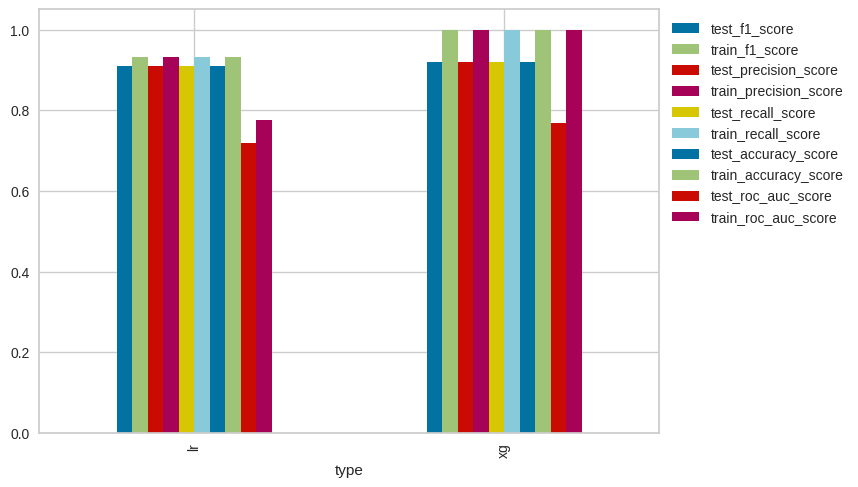

In [61]:
(xg_data
 .assign(type='xg')
 .pipe(lambda df: pd.concat([df, lr_data.assign(type='lr')]))
 .drop(columns=['fit_time', 'score_time'])
 .groupby('type')
 .mean()
 .plot.bar()
 .legend(bbox_to_anchor=(1,1))
)

A simple XGBoost model is not super useful than a simple Logistic Regression Model

### Tuning Models

Step-wise tuning of the model using a Tree-based Parzen Estimator (TPE) approach (which, under the hood is a Bayesian Optimization Technique). I have used the `hyperopt` library to implent this.

In [62]:
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from sklearn.metrics import accuracy_score, roc_auc_score
from typing import Any, Dict, Union
import xgboost as xgb

In [63]:
def hyperparameter_tuning(space : Dict[str, Union[float, int]],
                          X_train : pd.DataFrame,
                          X_test : pd.DataFrame,
                          y_train : pd.Series,
                          y_test : pd.Series,
                          early_stopping_rounds : int=50,
                          metric : callable=accuracy_score) -> Dict[str, Any]:

    #set the hyperparameters
    int_vals = ['max_depth', 'reg_alpha']
    space = {k : (int(val) if k in int_vals else val) for k, val in space.items()}
    space['early_stopping_rounds'] = early_stopping_rounds

    #run the model
    model = xgb.XGBClassifier(**space)
    evaluation = [(X_train, y_train), (X_test, y_test)]
    model.fit(X_train, y_train, eval_set=evaluation, verbose=False)

    #make predictions
    pred = model.predict(X_test)
    score = metric(y_test, pred)

    return {'loss' : -score, 'status' : STATUS_OK, 'model' : model}

In [64]:
params = {'random_state': 42, 'eval_metric': 'aucpr'}

In [65]:
rounds = [
    {'max_depth': hp.quniform('max_depth', 1, 8, 1),                 # tree options
     'min_child_weight': hp.loguniform('min_child_weight', -2, 3)},  # mcw proxy for how many times you split the tree
    {'scale_pos_weight': hp.uniform('scale_pos_weight', 0, 10),      # account for imbalanced data options
     'max_delta_step': hp.uniform('max_delta_step', 0, 10)},
    {'subsample': hp.uniform('subsample', 0.5, 1),                   # sampling options
     'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1)},
    {'reg_alpha': hp.uniform('reg_alpha', 0, 10),                    # regularization options
     'reg_lambda': hp.uniform('reg_lambda', 1, 10)},
    {'gamma': hp.loguniform('gamma', -10, 10)},                      # more regularization
    {'learning_rate': hp.loguniform('learning_rate', -7, 0)}         # boosting options
]

In [66]:
all_trials = []
for round in rounds:
    params = {**params, **round}
    trials = Trials()
    best = fmin(fn=lambda space: hyperparameter_tuning(space, X_train, X_test, y_train, y_test),
                space=params,
                algo=tpe.suggest,
                max_evals=20,
                trials=trials
                )
    params = {**params, **best}
    all_trials.append(trials)

100%|██████████| 20/20 [01:17<00:00,  3.88s/trial, best loss: -0.923667087501214]


In [67]:
params

{'random_state': 42,
 'eval_metric': 'aucpr',
 'max_depth': 5.0,
 'min_child_weight': 1.719661519120374,
 'scale_pos_weight': 1.041951839556744,
 'max_delta_step': 8.077357154745343,
 'subsample': 0.7378137482164451,
 'colsample_bytree': 0.9890629835401512,
 'reg_alpha': 7.964451432604589,
 'reg_lambda': 5.679582054054093,
 'gamma': 0.0004022128175590284,
 'learning_rate': 0.1985669243527336}

In [68]:
step_params = params

In [69]:
step_params['max_depth'] = int(step_params['max_depth'])

In [70]:
xg_step = xgb.XGBClassifier(**step_params, early_stopping_rounds=100, n_estimators=250)
xg_step.fit(X_train,
            y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100
            )
xg_step.score(X_test, y_test)

[0]	validation_0-aucpr:0.62476	validation_1-aucpr:0.63324
[100]	validation_0-aucpr:0.75661	validation_1-aucpr:0.68474
[157]	validation_0-aucpr:0.78726	validation_1-aucpr:0.67515


0.9214334272118093

In [71]:
xg_step.best_ntree_limit

58

In [72]:
xg_default = xgb.XGBClassifier()
xg_default.fit(X_train, y_train)
xg_default.score(X_test, y_test)

0.9185199572691075

[Text(0.5, 1.0, 'ROC plots for step model')]

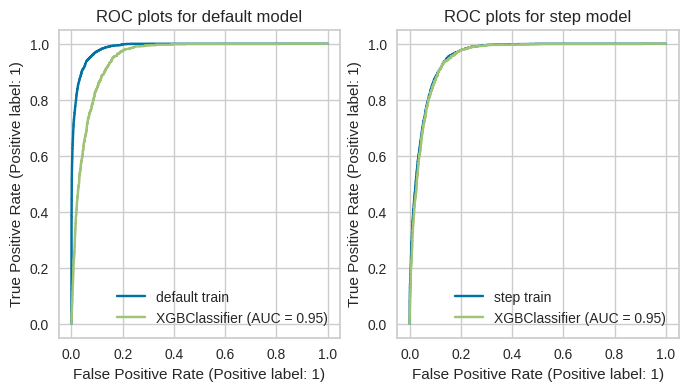

In [73]:
fig, axes = plt.subplots(figsize=(8, 4), ncols=2)

metrics.RocCurveDisplay.from_estimator(xg_default, X_train, y_train, ax=axes[0], label='default train')
metrics.RocCurveDisplay.from_estimator(xg_default, X_test, y_test, ax=axes[0])
axes[0].set(title='ROC plots for default model')

metrics.RocCurveDisplay.from_estimator(xg_step, X_train, y_train, ax=axes[1], label='step train')
metrics.RocCurveDisplay.from_estimator(xg_step, X_test, y_test, ax=axes[1])
axes[1].set(title='ROC plots for step model')

While the performance of both models is similar, the default model is overfitting, as is evident by the gap between the train and test curves. The step model seems to work fine.

[Text(0.5, 1.0, 'PR plots for stepwise model')]

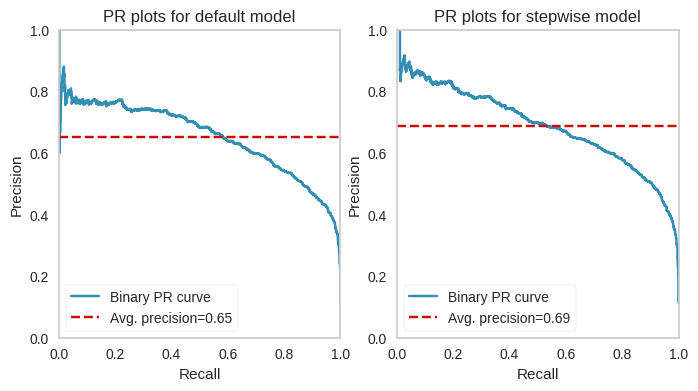

In [74]:
fig, axes = plt.subplots(figsize=(8, 4), ncols=2)

classifier.precision_recall_curve(xg_default, X_train, y_train, X_test, y_test,
                                  micro=False,
                                  macro=False,
                                  ax=axes[0],
                                  per_class=True,
                                  show=False
)
axes[0].set(title='PR plots for default model')

classifier.precision_recall_curve(xg_step, X_train, y_train, X_test, y_test,
                                  micro=False,
                                  macro=False,
                                  ax=axes[1],
                                  per_class=True,
                                  show=False
)
axes[1].set(title='PR plots for stepwise model')

Clearly, the step model is better than the default model.

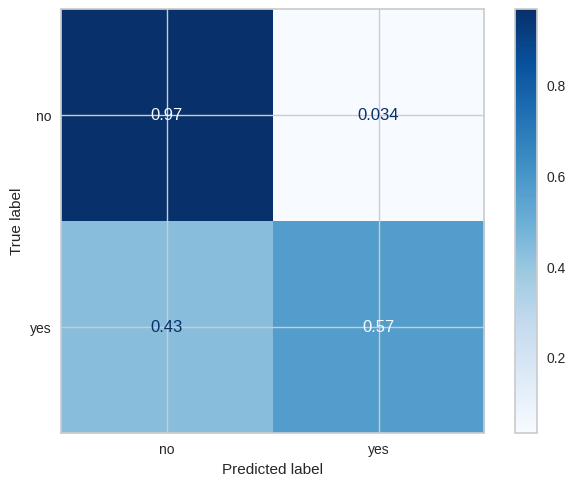

In [75]:
cm = metrics.confusion_matrix(y_test, xg_step.predict(X_test), normalize='true')
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['no', 'yes'])
disp.plot(cmap='Blues')

In [76]:
metrics.precision_score(y_test, xg_step.predict(X_test), average='micro')

0.9214334272118093

In [77]:
metrics.precision_score(y_test, xg_default.predict(X_test), average='micro')

0.9185199572691075

##### Check for overfitting

In [78]:
import yellowbrick.model_selection as ms

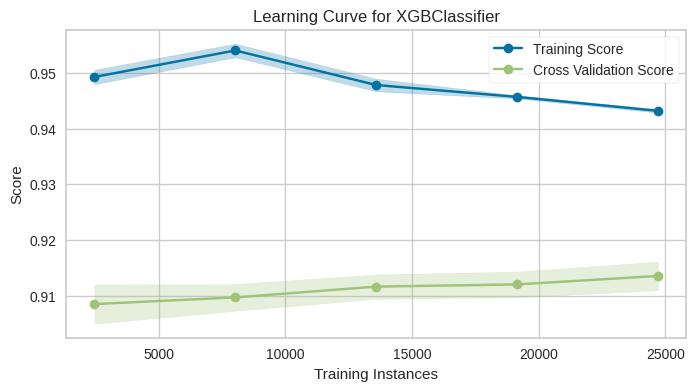

In [79]:
fig, ax = plt.subplots(figsize=(8, 4))
viz = ms.learning_curve(xgb.XGBClassifier(**step_params, n_estimators=250), X_train, y_train, ax=ax)

Clearly, we're not overfitting.

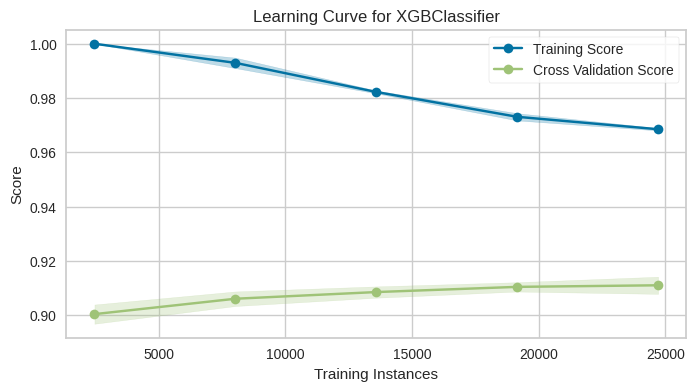

In [80]:
fig, ax = plt.subplots(figsize=(8, 4))
viz = ms.learning_curve(xgb.XGBClassifier(), X_train, y_train, ax=ax)

# Model Interpretation

## SHAP

In [82]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 8.2 MB/s eta 0:00:00


In [83]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [84]:
shap.initjs()

In [85]:
shap_ex = shap.TreeExplainer(xg_step)
vals = shap_ex(X_test)

In [86]:
vals_df = pd.DataFrame(vals.values, columns=X_test.columns, index=X_test.index)
vals_df

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_jun,month_nov,day_of_week_thu,day_of_week_mon,day_of_week_wed,day_of_week_tue,day_of_week_fri,poutcome_nonexistent,poutcome_failure,poutcome_success
31165,-0.074197,2.180024,0.068578,-0.065155,0.020790,0.116497,0.046377,-0.083605,0.023720,-0.194190,...,-0.002868,-0.002113,0.016843,0.005736,0.079156,-0.001826,0.011652,0.0,0.035255,-0.004693
26855,-0.014310,-3.027248,0.035136,-0.050684,0.007275,-0.088211,0.003735,-0.250112,-0.235999,-0.282090,...,-0.003534,0.001659,-0.030218,0.013042,-0.016798,-0.009618,0.003635,0.0,0.023466,-0.019425
38292,-0.162926,-2.066444,-0.035223,-0.108953,0.005251,0.353667,0.311004,0.234002,0.027585,1.092036,...,-0.000356,0.000109,0.001985,0.023472,0.066070,-0.005708,0.001912,0.0,0.023573,-0.023446
8532,0.058312,-0.609908,0.072776,-0.039375,0.010808,-1.083351,-0.130730,-0.102861,0.110631,-0.292303,...,0.005094,-0.000320,0.009120,0.034766,0.044994,0.011465,0.002048,0.0,0.024994,-0.005865
25472,-0.056810,-1.651461,0.080872,-0.046242,0.009261,0.051596,0.029843,-0.287443,-0.443634,-0.301592,...,-0.001062,0.003013,0.010683,0.011116,0.069121,-0.005289,0.004141,0.0,0.029887,-0.004832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,-0.047141,-1.730427,-0.022342,-0.042659,0.010937,-1.873523,-0.144152,-0.065880,0.244987,-0.295734,...,-0.000122,0.000368,0.008999,-0.018606,-0.008203,0.002516,-0.002486,0.0,0.019196,-0.004579
23672,-0.040765,-3.116850,-0.087002,-0.040992,0.004735,-1.148214,-0.005344,-0.076661,0.243577,-0.282197,...,-0.003771,0.000390,-0.023881,-0.005963,-0.010100,-0.001421,0.001494,0.0,0.010930,-0.019425
12770,-0.093310,-1.823533,0.028678,-0.045864,0.008176,-1.806276,-0.067439,-0.239353,0.184765,-0.306620,...,0.000228,-0.000374,0.012784,0.006361,-0.015598,0.017270,-0.002394,0.0,0.028904,-0.005082
4177,-0.081682,-2.021254,-0.086510,-0.035320,0.004541,-1.637031,-0.107734,-0.108421,0.300731,-0.246854,...,-0.005928,0.000116,0.007935,0.000109,-0.012110,-0.000273,-0.003575,0.0,0.015474,-0.004647


In [87]:
shap_ex.expected_value

-2.3919911

In [88]:
# index 40153 prediction

(vals_df.sum(axis='columns') + shap_ex.expected_value).pipe(lambda ser: ser[ser > 0])

40153    1.841933
31072    0.789061
40637    1.103112
40291    1.354833
40795    0.673732
           ...   
7555     0.200923
35227    0.423165
32317    0.632631
39988    0.090328
13792    0.194045
Length: 967, dtype: float32

In [89]:
vals_df.loc[40153]

age                             -0.076417
duration                        -0.047394
campaign                         0.059210
pdays                            1.257098
previous                        -0.019728
emp.var.rate                     0.360791
cons.price.idx                   0.040454
cons.conf.idx                    0.067278
euribor3m                        0.496010
nr.employed                      1.768543
job_admin.                      -0.002542
job_blue-collar                  0.019555
job_technician                  -0.010245
job_services                    -0.000690
job_management                  -0.000065
marital_married                  0.002726
marital_single                   0.002893
marital_divorced                -0.000494
marital_unknown                  0.000000
education_university.degree     -0.027719
education_high.school            0.007169
education_basic.9y               0.005408
education_professional.course   -0.000362
education_basic.4y               0

In [90]:
# original values

X_test.loc[40153]

age                                52.000
duration                          219.000
campaign                            1.000
pdays                               3.000
previous                            1.000
emp.var.rate                       -1.700
cons.price.idx                     94.215
cons.conf.idx                     -40.300
euribor3m                           0.846
nr.employed                      4991.600
job_admin.                          0.000
job_blue-collar                     0.000
job_technician                      1.000
job_services                        0.000
job_management                      0.000
marital_married                     1.000
marital_single                      0.000
marital_divorced                    0.000
marital_unknown                     0.000
education_university.degree         0.000
education_high.school               0.000
education_basic.9y                  0.000
education_professional.course       0.000
education_basic.4y                

In [91]:
X_test.index.get_loc(40153)

26

In [92]:
X_test.iloc[26]

age                                52.000
duration                          219.000
campaign                            1.000
pdays                               3.000
previous                            1.000
emp.var.rate                       -1.700
cons.price.idx                     94.215
cons.conf.idx                     -40.300
euribor3m                           0.846
nr.employed                      4991.600
job_admin.                          0.000
job_blue-collar                     0.000
job_technician                      1.000
job_services                        0.000
job_management                      0.000
marital_married                     1.000
marital_single                      0.000
marital_divorced                    0.000
marital_unknown                     0.000
education_university.degree         0.000
education_high.school               0.000
education_basic.9y                  0.000
education_professional.course       0.000
education_basic.4y                

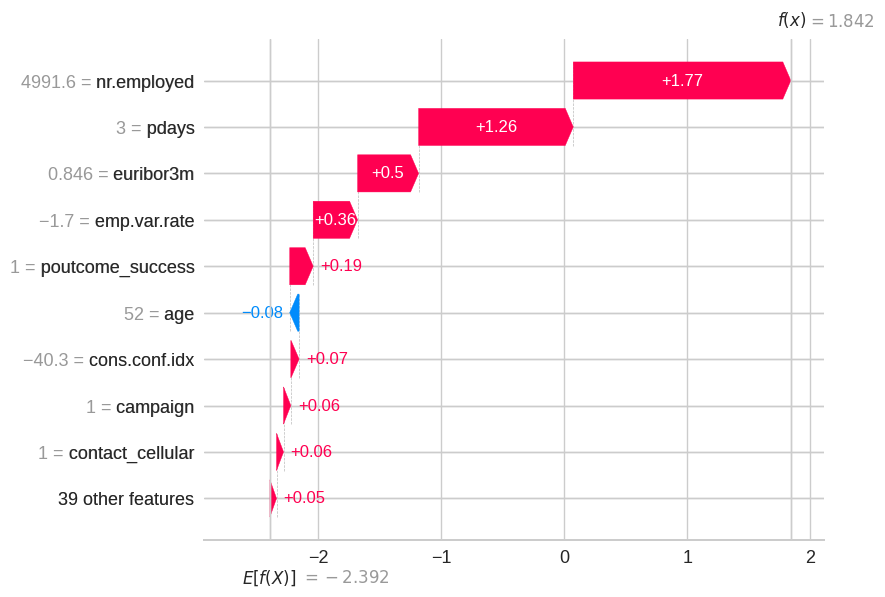

In [93]:
shap.plots.waterfall(vals[26])

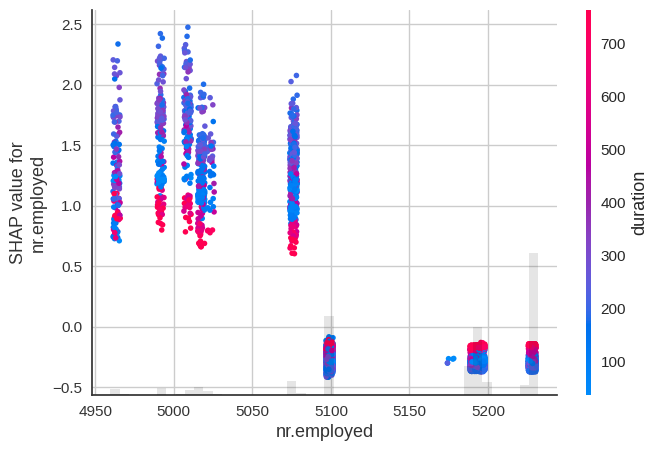

In [94]:
# dependence plot
# trying to understand nr.employed
shap.plots.scatter(vals[:, 'nr.employed'], color=vals)

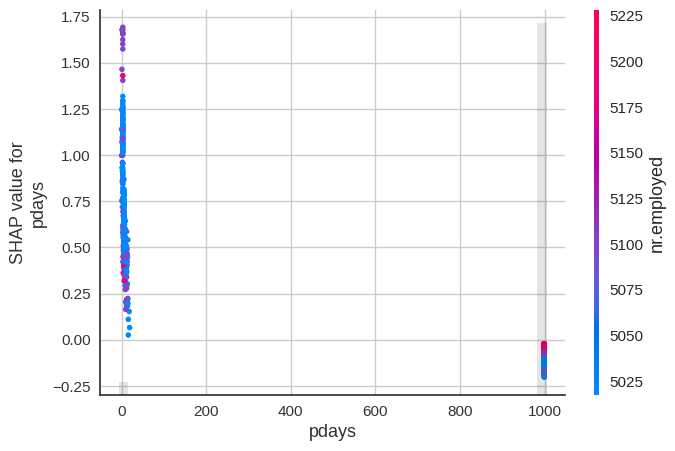

In [95]:
# dependence plot
# trying to understand pdays
# Remember- 999 means not contacted previously
shap.plots.scatter(vals[:, 'pdays'], color=vals)

(0.0, 20.0)

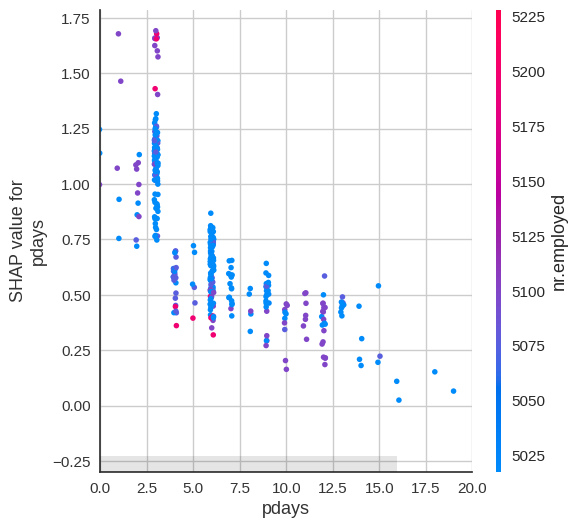

In [96]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,6))
shap.plots.scatter(vals[:, 'pdays'], color=vals, show=False, ax=ax)
ax.set_xlim(0,20)

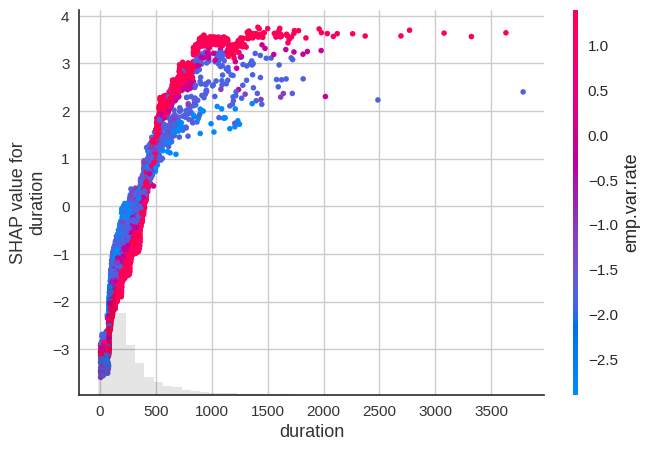

In [97]:
# dependence plot
shap.plots.scatter(vals[:, 'duration'], color=vals)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


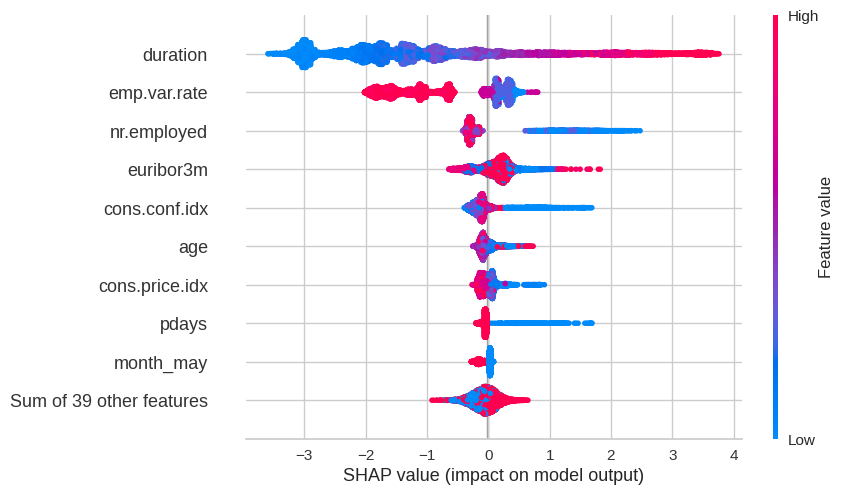

In [98]:
# global view
shap.plots.beeswarm(vals)

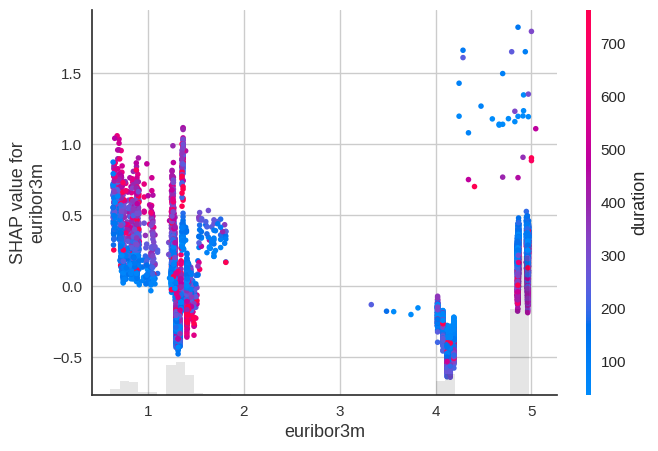

In [99]:
# dependence plot
shap.plots.scatter(vals[:, 'euribor3m'], color=vals)

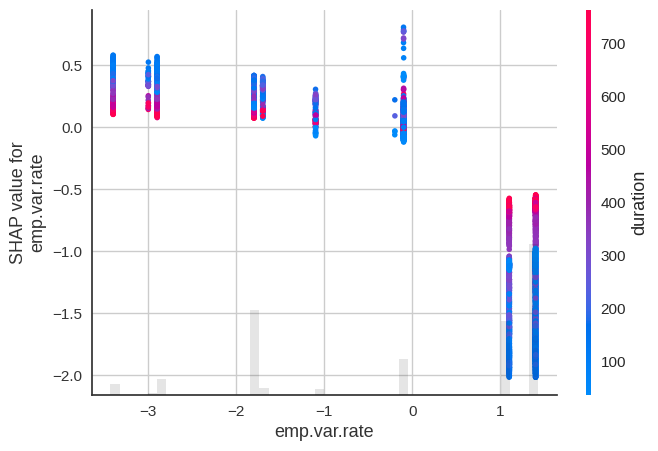

In [100]:
# dependence plot
shap.plots.scatter(vals[:, 'emp.var.rate'], color=vals)

## Constraints

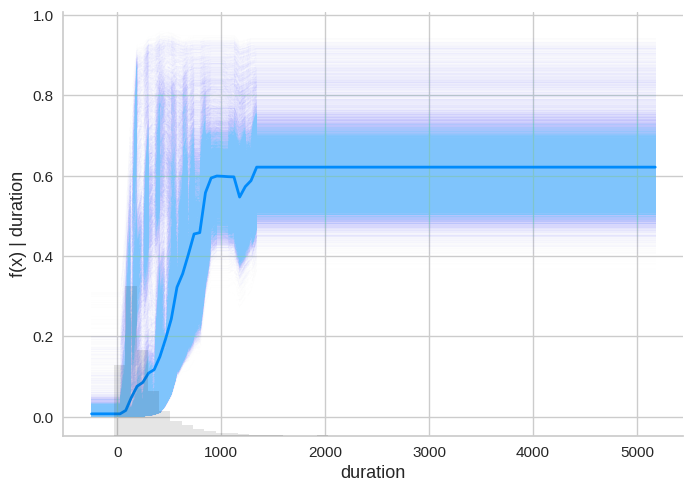

In [101]:
# PDP and ICE plots
shap.plots.partial_dependence(ind='duration',
      model=lambda rows: xg_step.predict_proba(rows)[:,-1],
      data=X_train)

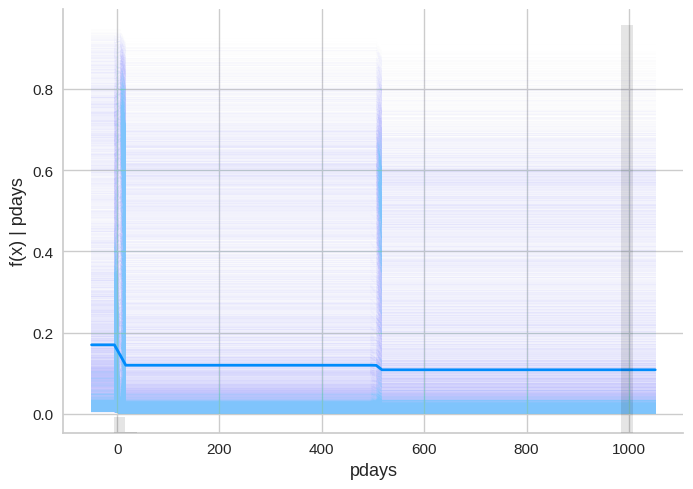

In [102]:
# PDP and ICE plots
shap.plots.partial_dependence(ind='pdays',
      model=lambda rows: xg_step.predict_proba(rows)[:,-1],
      data=X_train)

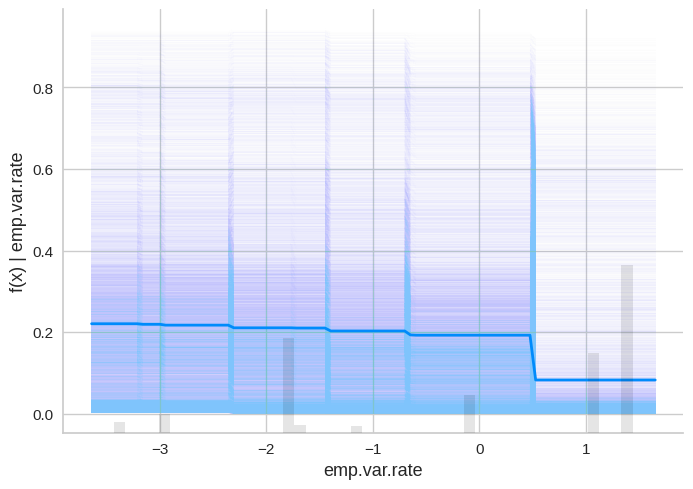

In [104]:
# PDP and ICE plots
shap.plots.partial_dependence(ind='emp.var.rate',
      model=lambda rows: xg_step.predict_proba(rows)[:,-1],
      data=X_train)

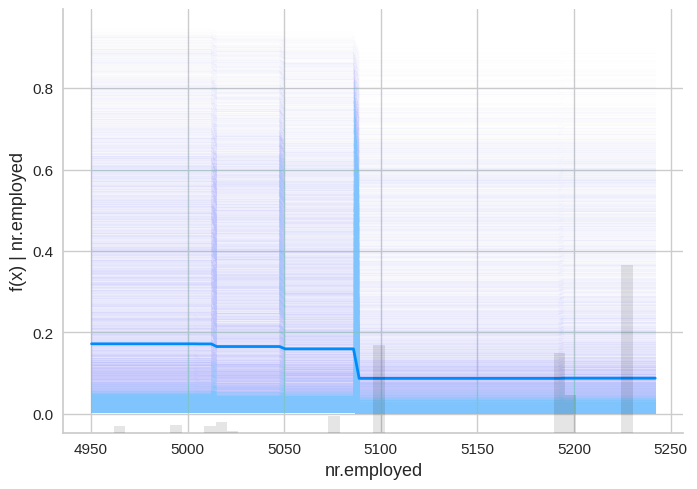

In [105]:
# PDP and ICE plots
shap.plots.partial_dependence(ind='nr.employed',
      model=lambda rows: xg_step.predict_proba(rows)[:,-1],
      data=X_train)

### Building a constraint model

In [107]:
# create a constrained XGBoost model
xg_constrained = xgb.XGBClassifier(**step_params,
                                   early_stopping_rounds=20,
                                   n_estimators=200,
                                   monotone_constraints={'duration': 1,  #  1 for monotonically increasing
                                                         'pdays': -1,    # -1 for monotonically decreasing
                                                         'emp.var.rate': -1,
                                                         'nr.employed': -1
                                                        }
                                  )
xg_constrained.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=100)
xg_constrained.score(X_test, y_test)

[0]	validation_0-aucpr:0.56947	validation_1-aucpr:0.58305
[97]	validation_0-aucpr:0.72939	validation_1-aucpr:0.68315


0.9227930465184034

In [109]:
metrics.precision_score(y_test, xg_constrained.predict(X_test), average='micro')

0.9227930465184034

In [112]:
metrics.precision_score(y_test, xg_step.predict(X_test), average='micro')

0.9214334272118093

Our constrained model is working better than the previous step model!!